In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm

In [9]:
Data = pd.read_csv('DataSet.csv')
Data.head

<bound method NDFrame.head of               Country  TotalArea   LandArea  WaterArea  \
0              Tuvalu       26.0       26.0        0.0   
1    Marshall Islands      181.0      181.0    11673.0   
2             Bahamas    13943.0    10010.0     3870.0   
3              Gambia    11295.0    10000.0     1295.0   
4               Nauru       21.0       21.0        0.0   
..                ...        ...        ...        ...   
167            Bhutan    38394.0    38394.0        0.0   
168             India  3287263.0  2973190.0   314073.0   
169          Pakistan   881913.0   856690.0    25223.0   
170             Nepal   147516.0   143686.0     3830.0   
171     United States  9833517.0  9147593.0   685924.0   

                     Highest.point  Maximum.elevation  \
0    Unnamed location on Niulakita                5.0   
1       Unnamed location on Likiep               10.0   
2     Mount Alvernia on Cat Island               63.0   
3                    Unnamed point           

In [41]:
single_var = Data.iloc[:, [1, 5]]
single_var.head

<bound method NDFrame.head of      TotalArea  Maximum.elevation
0         26.0                5.0
1        181.0               10.0
2      13943.0               63.0
3      11295.0               64.0
4         21.0               65.0
..         ...                ...
167    38394.0             7570.0
168  3287263.0             8586.0
169   881913.0             8611.0
170   147516.0             8848.0
171  9833517.0             6190.5

[172 rows x 2 columns]>

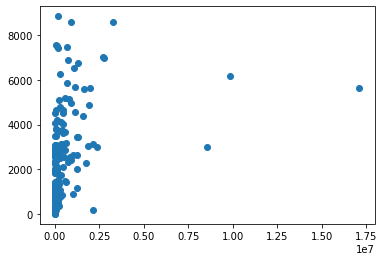

<bound method NDFrame.head of      TotalArea  Maximum.elevation
0         26.0                5.0
1        181.0               10.0
2      13943.0               63.0
3      11295.0               64.0
4         21.0               65.0
..         ...                ...
167    38394.0             7570.0
168  3287263.0             8586.0
169   881913.0             8611.0
170   147516.0             8848.0
171  9833517.0             6190.5

[172 rows x 2 columns]>

In [47]:
plt.scatter(Data.iloc[:, [1]],Data.iloc[:, [5]])

plt.show()

single_var.head

X-axis range: 1141748.0


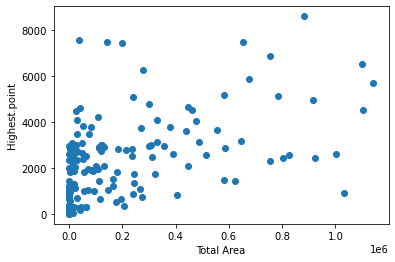

<bound method NDFrame.head of      TotalArea  Maximum.elevation
0         26.0                5.0
1        181.0               10.0
2      13943.0               63.0
3      11295.0               64.0
4         21.0               65.0
..         ...                ...
164   199951.0             7439.0
165   652867.0             7492.0
166   143100.0             7495.0
167    38394.0             7570.0
169   881913.0             8611.0

[150 rows x 2 columns]>

In [62]:
threshold=3
z_scores = np.abs((single_var['TotalArea'] - single_var['TotalArea'].mean()) / single_var['TotalArea'].std())
outliers = single_var[z_scores > threshold]
single_var = single_var[z_scores <= threshold]
plt.scatter(single_var.iloc[:,0],single_var.iloc[:,1])
plt.xlabel('Total Area')
plt.ylabel('Highest.point')
x_min = single_var.iloc[:, 0].max()

print('X-axis range:', x_min)
plt.show()
single_var.head


In [67]:
X=single_var.iloc[:,0]
Y=single_var.iloc[:,1]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Maximum.elevation   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     46.08
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           2.56e-10
Time:                        14:35:12   Log-Likelihood:                -1317.4
No. Observations:                 150   AIC:                             2639.
Df Residuals:                     148   BIC:                             2645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1718.0410    162.718     10.558      0.0

In [71]:
new_highest_point = model.predict(X)
print(new_highest_point)

0      1718.122870
1      1718.610957
2      1761.946710
3      1753.608309
4      1718.107126
          ...     
164    2347.675294
165    3773.881949
166    2168.654737
167    1838.941514
169    4495.134741
Length: 150, dtype: float64
